## This notebook plots the sensitivity analysis of the thermal model

In [1]:
%pylab notebook
import os, sys
sys.path.append('/Users/alexisdevitre/Documents/code/hts-irradiation')
import pandas as pd, hts_fitting as hts, default_figure_style as dfs, hts_fitfunctions as ff
from scipy.optimize import curve_fit

directory = '/Users/alexisdevitre/Desktop/1200keV/'
fpaths = [directory+f for f in os.listdir(directory) if f.split('.')[-1] == 'txt']
names = ['iop', 'hKapton', 'xSensor', 'tREBCO', 'tSensor']

data = pd.read_csv(fpaths[0], names=names, skiprows=5, delim_whitespace=True)
for fpath in fpaths[1:]:
    df = pd.read_csv(fpath, names=names, skiprows=5, delim_whitespace=True)
    data = pd.concat([data, df], ignore_index=True)


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


FileNotFoundError: [Errno 2] No such file or directory: '/Users/alexisdevitre/Desktop/1200keV/'

<IPython.core.display.Javascript object>


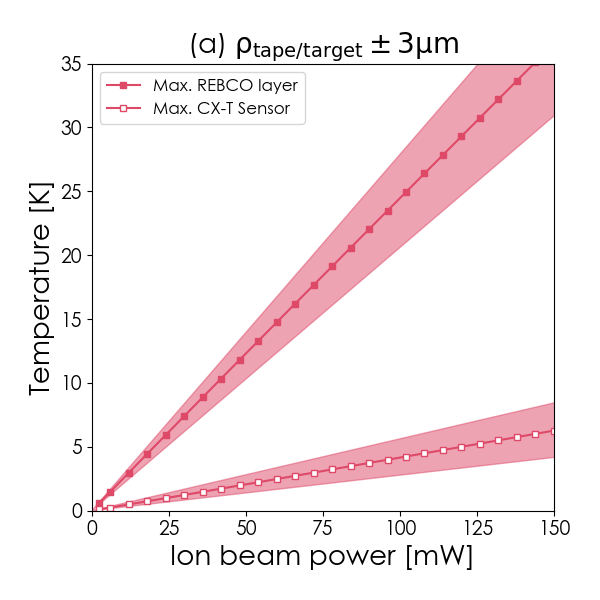

[array([0.20596428]), array([0.02780854])] [array([0.27881286]), array([0.05624962])]


In [145]:
xsmooth = np.linspace(0, 200, 10000)
fig, ax = plt.subplots()

x, y1, y2 = 1200*data.iop/1e3, data.tREBCO, data.tSensor

cut1 = (data.hKapton == data.hKapton.unique()[0]) & (data.xSensor == 0)
cut2 = (data.hKapton == data.hKapton.unique()[1]) & (data.xSensor == 0)
cut3 = (data.hKapton == data.hKapton.unique()[2]) & (data.xSensor == 0)

popttop, poptbot = [], []
cuts = [cut1, cut2, cut3]
markers = ['', 's', '']
labels = ['Max. REBCO layer', 'Max. CX-T Sensor']
for i, (cut, m) in enumerate(zip(cuts, markers)):
    ec = dfs.colors_energies['1200']
    
    for y, fc, l in zip([y1, y2], [dfs.colors_energies['1200'], 'white'], labels):
        
        popt, pcov = curve_fit(ff.affine, x[cut], y[cut])
        if i == 0:
            poptbot.append(popt)
        elif i == 2:
            popttop.append(popt)
        else:
            ax.plot(x[cut], y[cut], linestyle='-', marker=m, markersize=4, color=ec, mec=ec, mfc=fc, label=l)
            
print(poptbot, popttop)

ax.fill_between(x=xsmooth, y1=ff.affine(xsmooth, *popttop[0]), y2=ff.affine(xsmooth, *poptbot[0]), alpha=.5, color=ec)         
ax.fill_between(x=xsmooth, y1=ff.affine(xsmooth, *popttop[1]), y2=ff.affine(xsmooth, *poptbot[1]), alpha=.5, color=ec)         

ax.set_ylim(0, 35)
ax.set_xlim(0, 150)
yticks = [0.01, 0.1, 1, 10, 50]
#ax.set_yticks(yticks)
#ax.set_yticklabels([str(tick) for tick in yticks])
#ax.set_ylim(0.01, 50)
ax.set_title(r'(a) $\mathrm{\rho_{tape/target} \pm 3 \mu m}$')
ax.set_ylabel('Temperature [K]')
ax.set_xlabel('Ion beam power [mW]')
ax.legend(loc='upper left')
fig.tight_layout()

plt.savefig(dfs.outputDirectory+'sensitivity_rho.svg', facecolor='white')

<IPython.core.display.Javascript object>


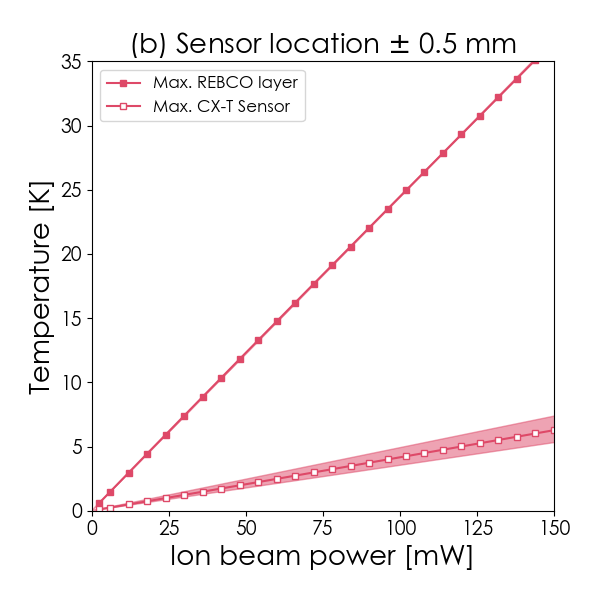

[array([0.24387786]), array([0.04909222])] [array([0.24464073]), array([0.03535357])]


In [146]:
xsmooth = np.linspace(0, 200, 10000)
fig, ax = plt.subplots()

x, y1, y2 = 1200*data.iop/1e3, data.tREBCO, data.tSensor

cut1 = (data.xSensor == data.xSensor.unique()[0]) & (data.hKapton == 1.3e-05)
cut2 = (data.xSensor == data.xSensor.unique()[1]) & (data.hKapton == 1.3e-05)
cut3 = (data.xSensor == data.xSensor.unique()[2]) & (data.hKapton == 1.3e-05)

popttop, poptbot = [], []
cuts = [cut1, cut2, cut3]
markers = ['s', '', '']
labels = ['Max. REBCO layer', 'Max. CX-T Sensor']
for i, (cut, m) in enumerate(zip(cuts, markers)):
    ec = dfs.colors_energies['1200']
    
    for y, fc, l in zip([y1, y2], [dfs.colors_energies['1200'], 'white'], labels):
        
        popt, pcov = curve_fit(ff.affine, x[cut], y[cut])
        if i == 1:
            poptbot.append(popt)
        elif i == 2:
            popttop.append(popt)
        else:
            ax.plot(x[cut], y[cut], linestyle='-', marker=m, markersize=4, color=ec, mec=ec, mfc=fc, label=l)

print(poptbot, popttop)

ax.fill_between(x=xsmooth, y1=ff.affine(xsmooth, *popttop[0]), y2=ff.affine(xsmooth, *poptbot[0]), alpha=.5, color=ec)         
ax.fill_between(x=xsmooth, y1=ff.affine(xsmooth, *popttop[1]), y2=ff.affine(xsmooth, *poptbot[1]), alpha=.5, color=ec)         

ax.set_ylim(0, 35)
ax.set_xlim(0, 150)
#yticks = [0.01, 0.1, 1, 10, 50]
#ax.set_yticks(yticks)
#ax.set_yticklabels([str(tick) for tick in yticks])
#ax.set_ylim(0.01, 50)
ax.set_title(r'(b) Sensor location $\pm$ 0.5 mm')
ax.set_ylabel('Temperature [K]')
ax.set_xlabel('Ion beam power [mW]')
ax.legend(loc='upper left')
fig.tight_layout()

plt.savefig(dfs.outputDirectory+'sensitivity_xsensor.svg', facecolor='white')

In [2]:
%pylab notebook

sys.path.append('/Users/alexisdevitre/Documents/code/hts-irradiation')
import default_figure_style as dfs, hts_fitfunctions as ff

from scipy.optimize import curve_fit
import os, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


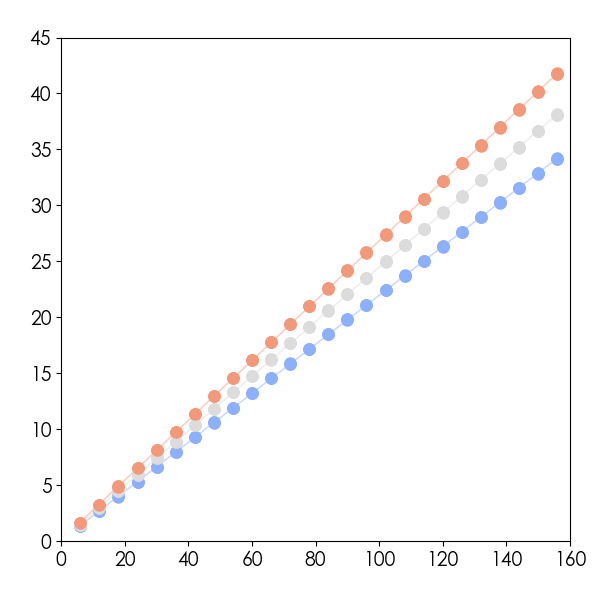

In [6]:
palette = sns.color_palette('coolwarm', 3)


path_to_file = '../data/fem/f28/1200keV/'
fpaths = [path_to_file+f for f in os.listdir(path_to_file)]

fig, ax = plt.subplots()

nominalThickness = 0
for i, fpath in enumerate(fpaths):
    nominalThickness += float(fpath.split('/')[-1].split('=')[1].split('um+')[0])
nominalThickness /= (i+1)

for fpath in fpaths:
    data = pd.read_csv(fpath, skiprows=5, delim_whitespace=True, names=['ibeam', 'hkapton', 'xsensor', 'dTREBCO', 'dTSensor'])
    energy = float(fpath.split('/')[-1].split('_')[1].split('keV')[0])
    apiezonThickness = 1e6*data.hkapton[0]
    sensorPosition = 4.96+1e3*data.xsensor[0]
    l = '{:4.0f} keV, {:4.1f} mm, {:4.0f} um'.format(energy, sensorPosition, apiezonThickness)
    
    if data.xsensor[0] == -5e-4:
        m = 'v'
    elif data.xsensor[0] == 5e-4:
        m = '^'
    else:
        m = 's'
    
    if apiezonThickness == nominalThickness-2:
        c = palette[0]
    elif apiezonThickness == nominalThickness+2:
        c = palette[2]
    else:
        c = palette[1]
        
    x = 1e-3*data.ibeam*energy
    y = data.dTREBCO
    
    xsmooth = x #np.arange(0, 160, xstep)
    popt, pcov = curve_fit(ff.linear, x, y)
    
    yfit = ff.linear(xsmooth, *popt)
    ax.plot(xsmooth, yfit, alpha=.2, linewidth=1, color=c)
    ax.plot(x, y, linestyle='None', label=l, color=c, marker=m)
    #ax.plot(xsmooth, y-yfit)
    #print(popt)
    #print(y)
    
#ax.legend()
ax.set_xlim(0, 160)
ax.set_ylim(0, 45)
#ax.set_xlabel('Ion beam power [mW]')
#ax.set_ylabel('y-yfit')#$\Delta T_{REBCO}$')
fig.tight_layout()